Plot the data table on Statistics Canada using Python. 

Source: 
- Working from home during the COVID-19 pandemic: How rates in Canada and the United States compare, https://www150.statcan.gc.ca/n1/pub/36-28-0001/2022008/article/00001-eng.htm
- Labor force, total - Canada, United States, https://data.worldbank.org/indicator/SL.TLF.TOTL.IN?end=2022&locations=CA-US&start=1991&view=chart
- Labor force, female (% of total labor force) - Canada, https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?end=2022&locations=CA&start=1991&view=chart

In [ ]:
!pip3 install pandas
!pip3 install matplotlib

In [3]:
# convert num to string, add , after every 3rd digit from the right
def num_to_str(num):
		num = str(num)
		num = num[::-1]
		num = ','.join([num[i:i+3] for i in range(0, len(num), 3)])
		num = num[::-1]
		return num

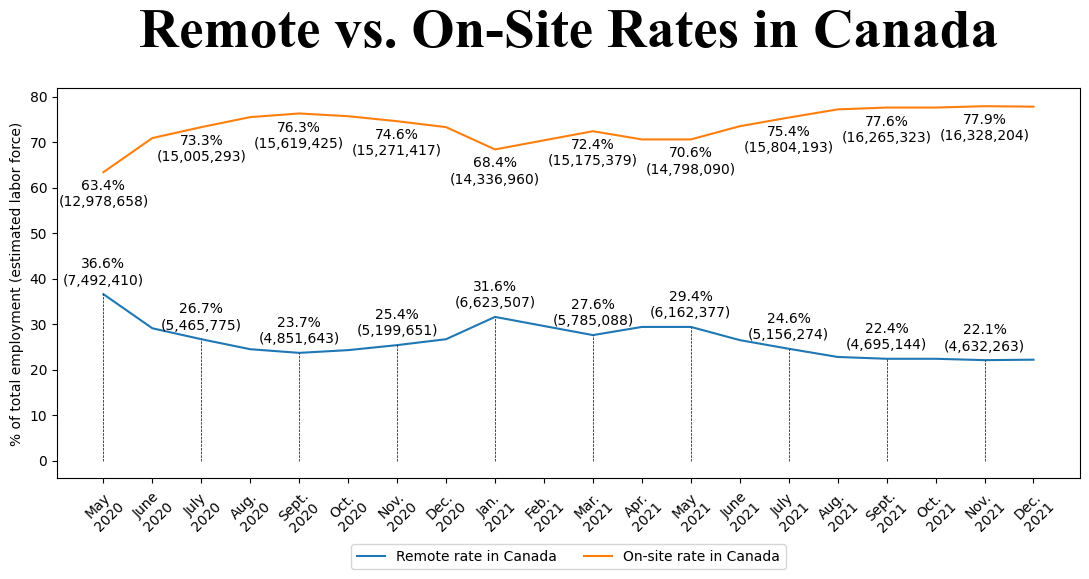

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

labor_force_total_ca_2020 = 20471068
labor_force_total_ca_2021 = 20960467
labor_force_total_us_2020 = 165641653
labor_force_total_us_2021 = 166189867

# Read data from CSV, the data contains white spaces and tabs, trim them
df = pd.read_csv('data/percentage-of-employees-working-from-home-canada-and-us.csv', skipinitialspace=True)

# Convert 'Year' and 'Month' columns to 'AbbrMonth-Year' column
df['Month'] = df['Month'].map(str) + '\n' + df['Year'].map(str)

# list keys in the df
# print(df.keys())

# list the first 5 rows in the df
# print(df.head())

# Calculate on-site rate
df['On-Site-Canada'] = 100 - df['Canada']
df['On-Site-US'] = 100 - df['United States']

# Plotting
plt.figure(figsize=(11, 6))
plt.plot(df['Month'], df['Canada'], label='Remote rate in Canada')
# plt.plot(df['Month'], df['United States'], label='Work-from-home rate in United States')
plt.plot(df['Month'], df['On-Site-Canada'], label='On-site rate in Canada')
# plt.plot(df['Month'], df['On-Site-US'], label='On-site rate in United States')

# Adding text labels
for index, row in df.iterrows():
	if index % 2 == 0:
		if row['Year'] == 2020:
			appr_ca = int(row['Canada'] * labor_force_total_ca_2020 / 100)
			appr_ca_onsite = labor_force_total_ca_2020 - appr_ca
			# appr_us = int(row['United States'] * labor_force_total_us_2020 / 100)
		elif row['Year'] == 2021:
			appr_ca = int(row['Canada'] * labor_force_total_ca_2021 / 100)
			appr_ca_onsite = labor_force_total_ca_2021 - appr_ca
			# appr_us = int(row['United States'] * labor_force_total_us_2021 / 100)
		plt.text(row['Month'], row['Canada'] + 1.5, f"{row['Canada']:.1f}%\n({num_to_str(appr_ca)})", ha='center', va='bottom')
		# plot a dash line vertically from the point to the x-axis
		plt.plot([row['Month'], row['Month']], [0, row['Canada']], 'k--', lw=0.5)
		# on-site
		plt.text(row['Month'], row['On-Site-Canada'] - 1.5, f"{row['On-Site-Canada']:.1f}%\n({num_to_str(appr_ca_onsite)})", ha='center', va='top')

# add title with font size 40, bold, New Times Roman, add 10px margin to the bottom
plt.title('Remote vs. On-Site Rates in Canada', fontsize=40, fontweight='bold', fontname='Times New Roman', pad=30)
plt.xlabel('')
plt.ylabel('% of total employment (estimated labor force)')
# plot the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
# plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

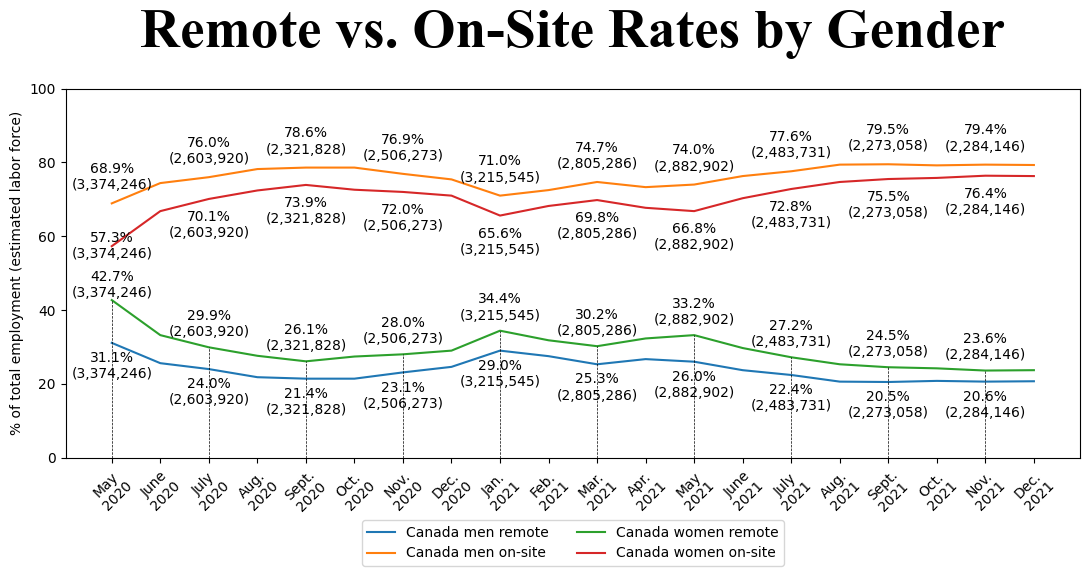

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

labor_force_total_ca_2020 = 20471068
labor_force_female_percent_ca_2020 = 47
labor_force_female_ca_2020 = int(labor_force_total_ca_2020 * labor_force_female_percent_ca_2020 / 100)
labor_force_male_ca_2020 = labor_force_total_ca_2020 - labor_force_female_ca_2020

labor_force_total_ca_2021 = 20960467
labor_force_female_percent_ca_2021 = 47.1
labor_force_female_ca_2021 = int(labor_force_total_ca_2021 * labor_force_female_percent_ca_2021 / 100)
labor_force_male_ca_2021 = labor_force_total_ca_2021 - labor_force_female_ca_2021

# Read data from CSV, the data contains white spaces and tabs, trim them
df = pd.read_csv('data/percentage-of-employees-working-from-home-canada-and-us.csv', skipinitialspace=True)

# Convert 'Year' and 'Month' columns to 'AbbrMonth-Year' column
df['Month'] = df['Month'].map(str) + '\n' + df['Year'].map(str)

# Calculate on-site rate
df['On-Site-Canada-Men'] = 100 - df['Canada men']
df['On-Site-Canada-Women'] = 100 - df['Canada women']

# Plotting
plt.figure(figsize=(11, 6))
plt.plot(df['Month'], df['Canada men'], label='Canada men remote')
plt.plot(df['Month'], df['On-Site-Canada-Men'], label='Canada men on-site')
plt.plot(df['Month'], df['Canada women'], label='Canada women remote')
plt.plot(df['Month'], df['On-Site-Canada-Women'], label='Canada women on-site')

# Adding text labels
for index, row in df.iterrows():
	if index % 2 == 0:
		if row['Year'] == 2020:
			appr_ca_men = int(row['Canada men'] * labor_force_male_ca_2020 / 100)
			appr_ca_men_onsite = labor_force_male_ca_2020 - appr_ca_men
			
			appr_ca_women = int(row['Canada women'] * labor_force_female_ca_2020 / 100)
			appr_ca_women_onsite = labor_force_female_ca_2020 - appr_ca_women
		elif row['Year'] == 2021:
			appr_ca_men = int(row['Canada men'] * labor_force_male_ca_2021 / 100)
			appr_ca_men_onsite = labor_force_male_ca_2021 - appr_ca_men
			
			appr_ca_women = int(row['Canada women'] * labor_force_female_ca_2021 / 100)
			appr_ca_women_onsite = labor_force_female_ca_2021 - appr_ca_women

		plt.text(row['Month'], row['Canada men'] - 2.2, f"{row['Canada men']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='top')
		plt.text(row['Month'], row['On-Site-Canada-Men'] + 3, f"{row['On-Site-Canada-Men']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')

		if index == 0:
			plt.text(row['Month'], row['On-Site-Canada-Women'] - 4, f"{row['On-Site-Canada-Women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
			plt.text(row['Month'], row['Canada women'], f"{row['Canada women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')
		else:
			plt.text(row['Month'], row['On-Site-Canada-Women'] - 3, f"{row['On-Site-Canada-Women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='top')
			plt.text(row['Month'], row['Canada women'] + 2.2, f"{row['Canada women']:.1f}%\n({num_to_str(appr_ca_men)})", ha='center', va='bottom')

		# plot a dash line vertically from the point to the x-axis
		plt.plot([row['Month'], row['Month']], [0, row['Canada women']], 'k--', lw=0.5)

# add title with font size 40, bold, New Times Roman, add 10px margin to the bottom
plt.title('Remote vs. On-Site Rates by Gender', fontsize=40, fontweight='bold', fontname='Times New Roman', pad=30)
plt.xlabel('')
plt.ylabel('% of total employment (estimated labor force)')
# plot the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
# plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()